# Lesson 2: Scientific Data Formats and Advanced Plotting

Author: Rebekah Esmaili (rebekah@stcnet.com)
 
---

## Lesson Objectives
* You will learn to:
    * Import relevant packages for scientific programming
    * Read netCDF files
    * Creating plots and maps
   

![](img/flowchart.png)




## Importing NetCDF files

NetCDF and HDF are self-describing formats, which are structured binary data files and useful for storing other big datasets. Computationally, it is faster to read in binary-based datasets than text, which needs to be parsed before being stored into a computer’s memory. Because the files are more compact, they are cheaper to store large, long-term satellite data. Furthermore, information about the data ("metadata") can be stored inside the file themselves.

Many environmental dataset names are quite long. However, the dataset name is encoded to give us information about the contents. For example:

```
JRR-AOD_v2r3_j01_s202304220518119_e202304220519346_c202304220600390.nc
```
You can learn several important features of the dataset without opening it:

* Prefix indicates the mission (JRR, for JPSS Risk Reduction)
* Product (Aerosol Optical Depth, or AOD), algorithm version
* Revision number (v2r3)
* Satellite source (j01 for JPSS-1/NOAA-20)
* Start (s), end (e), and creation (c) time, which are each followed by the year, month, day, hour, minute, and seconds (to one decimal place). 

First, import three commonly used packages in Python:

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

To begin, you need to first import [xarray](http://xarray.pydata.org/en/stable/io.html) which is tailored to open netCDF4 files and work with large arrays (like numpy and pandas). The [netCDF4 package](https://unidata.github.io/netcdf4-python/netCDF4/index.html) can also be used to import files. The [h5netcdf](https://github.com/h5netcdf/h5netcdf) is useful because it combines features of both netcdf4 and h5py so you can use one reader for two different file types.

In [39]:
import xarray as xr

Use the open_dataset function to import the above dataset. The engine option is used to read the files. Some possible file readers are "netcdf4", "scipy", "pydap", "h5netcdf", "pynio", "cfgrib", "pseudonetcdf", "zarr" but you also must have the packages installed.  

In [40]:
fname='data/JRR-AOD_v2r3_j01_s202304220518119_e202304220519346_c202304220600390.nc'
aod_file_id = xr.open_dataset(fname, engine='h5netcdf')

If you print the contents of the file_id variable, you will get a long list of the global attributes, variables, dimensions, and much more.

In [41]:
aod_file_id

<xarray.Dataset>
Dimensions:             (Rows: 768, Columns: 3200, AbiAODnchn: 11, LndLUTnchn: 4)
Coordinates:
    Latitude            (Rows, Columns) float32 ...
    Longitude           (Rows, Columns) float32 ...
Dimensions without coordinates: Rows, Columns, AbiAODnchn, LndLUTnchn
Data variables: (12/25)
    StartRow            int32 ...
    StartColumn         int32 ...
    QCExtn              (Rows, Columns) float32 ...
    QCTest              (Rows, Columns) float32 ...
    QCInput             (Rows, Columns) float32 ...
    QCPath              (Rows, Columns) float32 ...
    ...                  ...
    AOD550LndMdl        (Rows, Columns, LndLUTnchn) float32 ...
    ResLndMdl           (Rows, Columns, LndLUTnchn) float32 ...
    HighQualityPct      float32 ...
    RetrievalPct        float32 ...
    MeanAOD             float32 ...
    MeanAODHighQuality  float32 ...
Attributes: (12/39)
    Conventions:                              CF-1.5
    Metadata_Conventions:                     CF-1.5, Unidata Dataset Discove...
    standard_name_vocabulary:                 CF Standard Name Table (version...
    project:                                  JPSS Risk Reduction: Enterprise...
    institution:                              DOC/NOAA/NESDIS/NDE > S-NPP Dat...
    naming_authority:                         gov.noaa.nesdis.nde
    ...                                       ...
    geospatial_first_scanline_last_fov_lon:   111.19057
    geospatial_last_scanline_first_fov_lon:   142.35274
    geospatial_last_scanline_last_fov_lon:    110.78349
    geospatial_lat_units:                     degrees_north
    geospatial_lon_units:                     degrees_east
    geospatial_bounds:                        POLYGON((144.607 -32.7462,111.1...

The output above is worth inspecting. Inside Jupyter Notebooks, xarray allows you to inspect the file contents. Clicking on the arrows will show a preview of the metadata. Note that you can also use tools like [Panoply](https://www.giss.nasa.gov/tools/panoply/) to inspect the contents of the netCDF file outside of Python.

* __Dimensions__: The dimensions are named Rows and Columns, which are respectively 768 and 3200.

* __Coordinates__: The coordinates are Latitude and Longitude. These are both two dimensions.

* __Variables__: This file has only one variable, which is AOD550. It's dimensions are also Rows and Columns.

* __Attributes__: netCDF4 [CF-1.5 conventions](https://cfconventions.org/). Some of the information that we saw in the file name is also present: this product is the *JPSS Risk Reduction Unique Aerosol Optical Depth* (title) *Level 2* product (processing_level) and the data was collected from the *NOAA-20* (satellite_name) *VIIRS* instrument (instrument_name). The *start* (time_coverage_start) and *end* times (time_coverage_end) metadata fields are consistent with the filename. I recommend that you read netCDF file header contents, especially the first time you are working with new data. 

AOD is a unitless measure of the extinction of solar radiation by particles suspended in the atmosphere. High values of AOD can indicate the presence of dust, smoke, or another air pollutant while low values indicate a cleaner atmosphere. You can learn more about the AOD algorithm on the [NOAA STAR website](https://www.star.nesdis.noaa.gov/goesr/product_aero_aod.php).

Xarray syntax will resemble both Pandas and Numpy. Unlike numpy, N-D arrays can be labeled. Instead of having to remember indices numbers, we can extract elements using their coordinate or variables names.

Below I'll extract three important variables: AOD550, Latitude, and Longitude:

In [42]:
AOD_550 = aod_file_id['AOD550']
AOD_lat = aod_file_id['Latitude']
AOD_lon = aod_file_id['Longitude']

Let's print AOD_550 below. This variable contains only a portion of the original data array:

In [43]:
AOD_550

<xarray.DataArray 'AOD550' (Rows: 768, Columns: 3200)>
[2457600 values with dtype=float32]
Coordinates:
    Latitude   (Rows, Columns) float32 ...
    Longitude  (Rows, Columns) float32 ...
Dimensions without coordinates: Rows, Columns
Attributes:
    long_name:    Aerosol optical depth at 550 nm
    units:        1
    valid_range:  [-0.05  5.  ]

Xarray uses NumPy as a dependency so so we can use numpy functions like *.mean()*. First we have to make sure it's in the right format. If you check the type of *AOD_550*, you can see it's a *numpy.ndarray.*

In [44]:
type(AOD_550.values)

numpy.ndarray

Xarray handles missing data automatically, so if we do statistics on the array, it will not include them:

In [45]:
avgAOD = AOD_550.mean()
print(avgAOD)

<xarray.DataArray 'AOD550' ()>
array(0.0495275, dtype=float32)


For practice, we'll import a Sea Surface Temperature (SST) dataset from GOES-18. You can learn more about the SST dataset on the [NOAA STAR website](https://www.star.nesdis.noaa.gov/goesr/product_sst.php).

---
### Exercise 1 Importing netCDF files
1. Open the file ```data/OR_ABI-L2-SSTF-M6_G18_s20231122000211_e20231122059519_c20231122105091.nc``` using the xarray library
2. Print the variable names
3. What are the dimensions?
---

**Solution:**

## Importing HDF files
HDF files are also common in the Earth Sciences. HDF5 is a general-purpose data format, while netCDF4 was designed for storing array-oriented scientific data. Tools like xarray can open HDF5 files if you have helper packages also installed (e.g. ```h5netcdf```).

HDF5 files often are organized into groups, which you can think of as subdirectories to organize the data inside the file. Xarray can open grouped data, but it doesn't support printing out the various structures in the file. We can use the h5py package to do so. The syntax is slightly different, but the steps are similar.

In [63]:
import h5py

filename = 'data/SVM16_j01_d20230422_t0516461_e0518106_b28103_c20230422055438143201_oeac_ops.h5'
f = h5py.File(filename, 'r')

We can use the ```visit``` command to find the conents of the HDF5 file. Visit requires us to pass a function, we will use print.

In [47]:
f.visit(print)

All_Data
All_Data/VIIRS-M16-SDR_All
All_Data/VIIRS-M16-SDR_All/BrightnessTemperature
All_Data/VIIRS-M16-SDR_All/BrightnessTemperatureFactors
All_Data/VIIRS-M16-SDR_All/ModeGran
All_Data/VIIRS-M16-SDR_All/ModeScan
All_Data/VIIRS-M16-SDR_All/NumberOfBadChecksums
All_Data/VIIRS-M16-SDR_All/NumberOfDiscardedPkts
All_Data/VIIRS-M16-SDR_All/NumberOfMissingPkts
All_Data/VIIRS-M16-SDR_All/NumberOfScans
All_Data/VIIRS-M16-SDR_All/PadByte1
All_Data/VIIRS-M16-SDR_All/QF1_VIIRSMBANDSDR
All_Data/VIIRS-M16-SDR_All/QF2_SCAN_SDR
All_Data/VIIRS-M16-SDR_All/QF3_SCAN_RDR
All_Data/VIIRS-M16-SDR_All/QF4_SCAN_SDR
All_Data/VIIRS-M16-SDR_All/QF5_GRAN_BADDETECTOR
All_Data/VIIRS-M16-SDR_All/Radiance
All_Data/VIIRS-M16-SDR_All/RadianceFactors
Data_Products
Data_Products/VIIRS-M16-SDR
Data_Products/VIIRS-M16-SDR/VIIRS-M16-SDR_Aggr
Data_Products/VIIRS-M16-SDR/VIIRS-M16-SDR_Gran_0


Another way to do this is combining the ```list``` and ```keys()``` commands:

In [48]:
dset_all = f['All_Data/VIIRS-M16-SDR_All']
list(dset_all.keys())

['BrightnessTemperature',
 'BrightnessTemperatureFactors',
 'ModeGran',
 'ModeScan',
 'NumberOfBadChecksums',
 'NumberOfDiscardedPkts',
 'NumberOfMissingPkts',
 'NumberOfScans',
 'PadByte1',
 'QF1_VIIRSMBANDSDR',
 'QF2_SCAN_SDR',
 'QF3_SCAN_RDR',
 'QF4_SCAN_SDR',
 'QF5_GRAN_BADDETECTOR',
 'Radiance',
 'RadianceFactors']

Once we know the groups, we can pass that into xarray using the group arguement (```group='All_Data/VIIRS-M16-SDR_All'```). This dataset has "phony" dimensions, which do not correspond to physical dimensions of the data. This file does not have coordinates (lat/lon or x/y) values becuase they are stored in a separate file. We won't use this data any futher, but it's here to walk through the steps.

In [49]:
ds_all = xr.open_dataset(filename, engine='h5netcdf', group='All_Data/VIIRS-M16-SDR_All', phony_dims='sort')
ds_all

<xarray.Dataset>
Dimensions:                       (phony_dim_0: 768, phony_dim_1: 3200, phony_dim_2: 2, phony_dim_3: 1, phony_dim_4: 48, phony_dim_5: 3, phony_dim_6: 16)
Dimensions without coordinates: phony_dim_0, phony_dim_1, phony_dim_2, phony_dim_3, phony_dim_4, phony_dim_5, phony_dim_6
Data variables: (12/16)
    BrightnessTemperature         (phony_dim_0, phony_dim_1) uint16 ...
    BrightnessTemperatureFactors  (phony_dim_2) float32 ...
    ModeGran                      (phony_dim_3) uint8 ...
    ModeScan                      (phony_dim_4) uint8 ...
    NumberOfBadChecksums          (phony_dim_4) int32 ...
    NumberOfDiscardedPkts         (phony_dim_4) int32 ...
    ...                            ...
    QF2_SCAN_SDR                  (phony_dim_4) uint8 ...
    QF3_SCAN_RDR                  (phony_dim_4) uint8 ...
    QF4_SCAN_SDR                  (phony_dim_0) uint8 ...
    QF5_GRAN_BADDETECTOR          (phony_dim_6) uint8 ...
    Radiance                      (phony_dim_0, phony_dim_1) uint16 ...
    RadianceFactors               (phony_dim_2) float32 ...

## Plotting 3-dimensional Data

So far, we have only made line and scatter plots. Matplotlib also supports plotting spatial datasets. However, we often have to do perform several array operations to ensure the x, y, and z coordinates are the same shape. Let's work with the a Reflected Shortwave Radiation (RSR) dataset in the next example and make a 3D plot. To learn more, visit the [NOAA STAR](https://www.star.nesdis.noaa.gov/goesr/product_sw.php) page. Below is the file that we will import:

```
data/OR_ABI-L2-RSRF-M6_G16_s20231121800204_e20231121809512_c20231121859124.nc
```

In [50]:
filename = 'data/OR_ABI-L2-RSRF-M6_G16_s20231121800204_e20231121809512_c20231121859124.nc'
abi_L2_RSR = xr.open_dataset(filename, engine='h5netcdf')

Like before, you can inspect the contents by typing the variable name:

In [51]:
abi_L2_RSR

<xarray.Dataset>
Dimensions:                                 (lat: 652, lon: 652, number_of_time_bounds: 2, number_of_image_bounds: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_wavelength_bounds: 2)
Coordinates:
    t                                       datetime64[ns] ...
  * lat                                     (lat) float32 81.38 81.12 ... -81.38
  * lon                                     (lon) float32 -156.4 ... 6.375
    lat_image                               float32 ...
    lon_image                               float32 ...
    retrieval_local_zenith_angle            float32 ...
    quantitative_local_zenith_angle         float32 ...
    retrieval_solar_zenith_angle            float32 ...
    quantitative_solar_zenith_angle         float32 ...
    rsr_product_wavelength                  float32 ...
Dimensions without coordinates: number_of_time_bounds, number_of_image_bounds, number_of_LZA_bounds, number_of_SZA_bounds, number_of_wavelength_bounds
Data variables: (12/32)
    RSR                                     (lat, lon) float32 ...
    DQF                                     (lat, lon) float32 ...
    time_bounds                             (number_of_time_bounds) datetime64[ns] ...
    goes_lat_lon_projection                 int32 ...
    lat_image_bounds                        (number_of_image_bounds) float32 ...
    lon_image_bounds                        (number_of_image_bounds) float32 ...
    ...                                      ...
    std_dev_rsr                             float32 ...
    percent_uncorrectable_GRB_errors        float32 ...
    percent_uncorrectable_L0_errors         float32 ...
    algorithm_dynamic_input_data_container  int32 ...
    processing_parm_version_container       int32 ...
    algorithm_product_version_container     int32 ...
Attributes: (12/29)
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    ...                        ...
    cdm_data_type:             Image
    time_coverage_start:       2023-04-22T18:00:20.4Z
    time_coverage_end:         2023-04-22T18:09:51.2Z
    timeline_id:               ABI Mode 6
    production_data_source:    Realtime
    id:                        1e9f2b8a-9d88-4b0e-af12-3b9377fad411

From the printed information above, we can see the following:

* __Dimensions__: The dimensions are named ```lat``` and ```lon```, both have the size of 652. There are several additional dimensions (number_of_time_bounds, number_of_image_bounds, number_of_LZA_bounds, number_of_SZA_bounds, number_of_wavelength_bounds) that we won't use in this tutorial.

* __Coordinates__: ```lat``` and ```lon```, which are both one dimensional.

* __Data Variables__: Has 39 variables, we'll focus on ```AOD550```.

Below you can import the data values into variables:

In [52]:
lat_rsr = abi_L2_RSR.lat.values
lon_rsr = abi_L2_RSR.lon.values
rsr = abi_L2_RSR.RSR.values

Let's inspect the shape and see if the data are already formatted for plotting:

In [53]:
rsr.shape, lat_rsr.shape, lon_rsr.shape

((652, 652), (652,), (652,))

Contour plots and mesh plots are two useful ways of looking at 3-dimensional data. Both plots require the x, y, and z coordinates to have the same 2D grid. 

You can use ```np.meshgrid()``` to project the 1-dimensional x and y coordinates into two dimensions. The function is a little confusing at first, so I'll show a simple example. Suppose you have to simple arrays:

In [54]:
tmp_x = [1,2]
tmp_y = [3,4,5]

```tmp_x``` has two elements and ```tmp_y``` has three. If you create a mesh of the two variables, there will be two variables, both with 3 rows and 2 columns: 

In [55]:
np.meshgrid(tmp_x, tmp_y)

[array([[1, 2],
        [1, 2],
        [1, 2]]),
 array([[3, 3],
        [4, 4],
        [5, 5]])]

Returning to the example, below is the meshgrid of the 1-dimensional latitude and longitude coordinates:

In [56]:
X_rsr, Y_rsr = np.meshgrid(lon_rsr, lat_rsr)

Before plotting, you need to check if all the dimensions match. However, after comparing the shape of co to X_co, you can see that the dimensions are flipped:

In [57]:
rsr.shape, X_rsr.shape

((652, 652), (652, 652))

We've already learned how to use ```plt.subplot()``` to generate the empty figure (```fig```) and axis (```ax```). 

One line 2, you call ```ax.contourf``` and input the X_co, Y_co, and transposed co variables. co acts as a color value, which becomes the third dimension of the plot. You then store this object into a variable ```rsr_plot``` so that you can pass it into ```ax.colorbar``` in order to map the colors to numeric values.

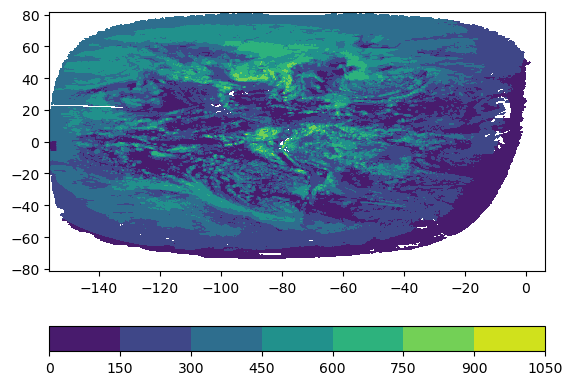

In [64]:
# contourf
fig = plt.figure()
ax = plt.subplot(111)
rsr_plot = ax.contourf(X_rsr, Y_rsr, rsr)
fig.colorbar(rsr_plot, orientation='horizontal', ax=ax)
plt.show()

Like contour plots, mesh plots are also 2-dimensional plots that display 3-dimensions of information using x, y, coordinates and z for a color scale. However, mesh plots do not perform any smoothing and display data as-is on a regular grid. However, since many satellite datasets are swath-based, irregularly spaced data needs to be re-gridded in order to display it as a mesh grid. In the code block below, let’s compare how the sst data looks using pcolormesh command with the previous example using contour. The code below has no other changes to the plot other than the call to the plot type.

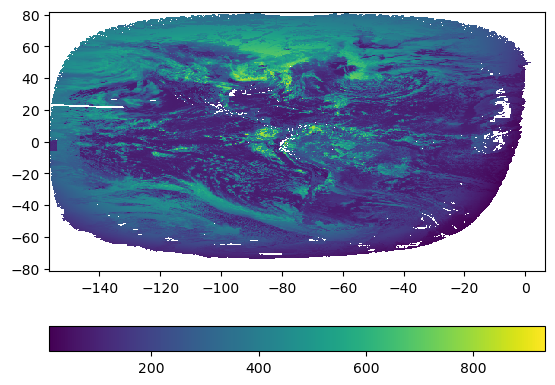

In [59]:
#pcolormesh
fig = plt.figure()
ax = plt.subplot(111)
sst_plot = ax.pcolormesh(X_rsr, Y_rsr, rsr, shading='auto')
fig.colorbar(sst_plot, orientation='horizontal')
plt.show()

You might notice that there is more structure in the mesh plot than the filled contour. This is useful if you wish to examine fine structure and patterns.

---
### Exercise 2: Plot 3-dimensional data

Plot ```AOD_lat```, ```AOD_lon```, and ```AOD_550``` (which we imported from the ```JRR-AOD_v2r3_j01_...``` netCDF file as:

1. Check the dimensions for all variables using ```.shape```.
2. Do you need to generate a meshgrid with ```np.meshgrid()```?
3. Create a contour plot using the ```contourf()```

---
**Solution:**

## Adding maps to plots

The package [Cartopy](https://scitools.org.uk/cartopy/docs/latest/) add mapping functionality to Matplotlib. Cartopy provides an interface to obtain continent, country, and feature details to overlay onto your plot. Furthermore, Cartopy also enables you to convert your data from one map projection to another, which requires a cartesian coordinate system to the map coordinates. Matplotlib natively supports the six mathematical and map projections (Aitoff, Hammer, Lambert, Mollweide, polar, and rectilinear) and combined with Cartopy, data can be transformed to a total of 33 possible projections.

In [60]:
from cartopy import crs as ccrs

Just like before, we need to convert the 1D lat and lon coordinates to 2D using meshgrid. We can check the shape to ensure all variables have the same dimensions.

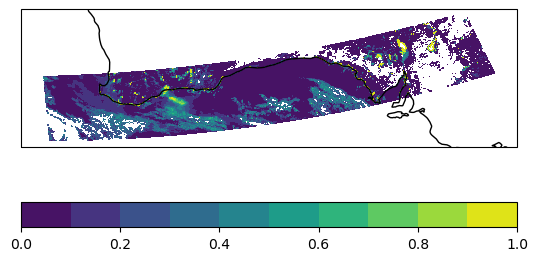

In [61]:
fig = plt.figure()
ax = plt.subplot(projection=ccrs.PlateCarree())

tmp = ax.contourf(AOD_lon, AOD_lat, AOD_550, levels=np.arange(0, 1.1, 0.1))
fig.colorbar(tmp, orientation='horizontal')

ax.coastlines('50m')
plt.show()

In the next example, you can switch from Plate Carrée to Orthographic. You must define the projection twice, once in the ```projection=``` keyword and again in the ```transform=```. In the ```plt.subplot``` line, you must define the to coordinates (```ccrs.Orthographic```), which is how you want to axes to show the data. In the ```ax.scatter``` line, you use the transform keyword argument in scatter to define the from coordinates (Plate Carrée), which are the coordinates that the data formatted for.

/home/rebekah/miniconda3/envs/python-workshop/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/rebekah/miniconda3/envs/python-workshop/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/rebekah/miniconda3/envs/python-workshop/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


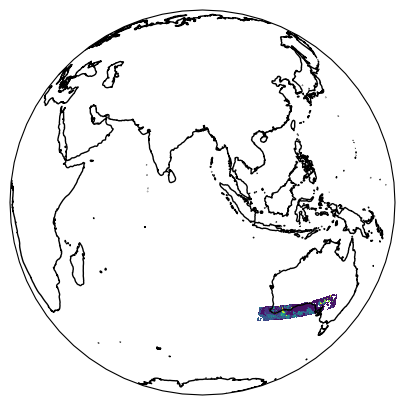

In [62]:
fig = plt.figure(figsize=[10,5])
ax = plt.subplot(projection=ccrs.Orthographic(90, 0))
ax.set_global()

ax.contourf(AOD_lon, AOD_lat, AOD_550, transform=ccrs.PlateCarree(), levels=np.arange(0, 1.1, 0.1))

ax.coastlines('50m')
plt.show()

---
### Exercise 3 Adding maps to plots

Using ```lat_rsr```, ```lon_rsr```, and ```rsr``` (which we imported from the ```OR_ABI-L2-RSRF-M6_G18_...``` netCDF file):

1. Create a ```contourf``` plot (same as Exercise 2)
2. Add the coastlines to a standard Plate Caree plot using ```projection=``` option.

---
**Solution**:

## Summary:

You learned:

* How to import netCDF4, a scientific dataset
* Worked with arrays and lists
* How to create a simple maps

Next lesson:
* Obtain datasets from remote sources
* Save data into text and binary files, and plots as images